<a href="https://colab.research.google.com/github/A-T-ELgammal/GNSS-data/blob/main/GNSS-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from math import sin, cos, radians, atan2
from prettytable import PrettyTable


data: list[list[float]] = [
        [1621693264.0155628, 9521, -35074, 3.92, -1.35] ,
        [1621693264.4237902, 9365, -34853, 3.85, -1.24],
        [1621693264.1979840, 9450, -34970, 3.93, -1.22],
        [1621693264.6384845, 9291, -34759, 3.85, -1.12],
        [1621693264.8448036, 9211, -34649, 3.77, -0.99],
        [1621693265.0378000, 9140, -34547, 3.70, -0.90],
        [1621693265.2572992, 9071, -34444, 3.70, -0.70],
        [1621693265.4631655, 8988, -34334, 3.59, -0.55],
        [1621693265.6851535, 8917, -34231, 3.59, -0.49],
        [1621693265.8768837, 8839, -34126, 3.56, -0.46],
        [1621693266.1154845, 8767, -34021, 3.66, -0.38],
        [1621693266.2963840, 8689, -33914, 3.78, -0.44],
        [1621693266.5014370, 8614, -33808, 3.74, -0.53],
        [1621693266.7386210, 8540, -33704, 3.73, -0.75],
        [1621693266.9416296, 8452, -33590, 3.66, -0.91],
        [1621693267.1762938, 8392, -33494, 3.55, -0.97],
        [1621693267.3843954, 8326, -33399, 3.63, -1.00],
        [1621693267.5642680, 8255, -33292, 3.77, -0.89],
        [1621693267.7781956, 8176, -33189, 3.90, -1.00],
        [1621693268.0044500, 8112, -33099, 3.88, -1.24],
        [1621693268.2188272, 8044, -32986, 3.82, -1.58],
        [1621693268.4177945, 7969, -32892, 3.75, -1.95],
        [1621693268.6272150, 7906, -32804, 3.77, -2.05],
        [1621693268.8552556, 7835, -32705, 3.80, -1.95],
        [1621693269.0375066, 7759, -32616, 3.81, -1.72],
        [1621693269.2567391, 7677, -32504, 3.88, -1.31],
        [1621693269.4572983, 7593, -32391, 3.98, -1.04],
        [1621693269.8621871, 7453, -32193, 4.07, -1.17],
        [1621693270.0862586, 7386, -32103, 4.06, -1.31],
        [1621693270.2752004, 7301, -31996, 4.06, -1.56],
]

In [ ]:
def calculate_projection(GNSS_x: float, GNSS_y: float, roll_deg: float, pitch_deg: float) -> Tuple[float, float]:
  model_x: float = 0; model_y: float = 0; model_z: float = 1500; GNSS_z: float = 0

  x_relative: float = GNSS_x - model_x
  y_relative: float= GNSS_y - model_y
  z_relative: float= GNSS_z - model_z

  relative_position: np.ndarray(list[list[float]]) = np.array([[x_relative],
                                [y_relative],
                                [z_relative]])

  R_roll: np.ndarray(list[list[float]]) = np.array([[1, 0, 0],
                     [0, cos(radians(roll_deg)), -np.sin(np.radians(roll_deg))],
                     [0, sin(radians(roll_deg)), cos(np.radians(roll_deg))]])
  R_pitch: np.ndarray(list[list[float]]) = np.array([[cos(np.radians(pitch_deg)), 0, -np.sin(np.radians(pitch_deg))],
                      [0, 1, 0],
                      [sin(np.radians(pitch_deg)), 0,cos(np.radians(pitch_deg))]])

  R_combined: np.ndarray(list[list[float]])  = np.dot(R_roll, R_pitch)

  projected_position: np.ndarray(list[list[float]]) = np.dot(R_combined, relative_position)
  projected_x: list[float] = projected_position[0][0]
  projected_y: list[float] = projected_position[1][0]

  return projected_x, projected_y

In [ ]:
def calculate_heading_angle(roll_deg: float, pitch_deg: float) -> float:
    cos_yaw: float = sin(radians(roll_deg)) * cos(radians(pitch_deg))
    sin_yaw: float = cos(radians(roll_deg)) * cos(radians(pitch_deg))
    yaw_angle: float = atan2(cos_yaw, sin_yaw)

    return yaw_angle

In [ ]:
def scatter_plot_3d(time_steps: list[float], projected_positions: list[Tuple[float, float]], heading_angles: list[float]):
  projected_x_positions: list[float] = []
  projected_y_positions: list[float] = []

  for x_pos, y_pos in projected_positions:
    projected_x_positions.append(x_pos)
    projected_y_positions.append(y_pos)

  figure_height: int = 10; figure_width: int = 7; subplot_grid_position: int = 111
  projection: str = '3d'; cmap: str = 'viridis'

  fig = plt.figure(figsize=(figure_height, figure_width))
  ax = fig.add_subplot(subplot_grid_position, projection=projection)

  ax.scatter(projected_x_positions, projected_y_positions, c=time_steps, cmap=cmap)

  ax.set_xlabel('Projected X')
  ax.set_ylabel('Projected Y')
  ax.set_zlabel('Heading Angle')
  ax.set_title('3D Scatter Plot (GNSS)')

In [ ]:
def main():
  projected_positions: list[Tuple[float, float]] = []
  heading_angles: list[float] = []
  times_s: list[float] = []

  table = PrettyTable()
  table.field_names: list[str] = ["Time", "Projected X", "Projected Y", "Heading Angle"]

  for time_s, x_mm, y_mm, roll_deg, pitch_deg in data:
    calculated_projection: Tuple[float, float] = calculate_projection(x_mm, y_mm, roll_deg, pitch_deg)
    calculated_heading_angle: float = calculate_heading_angle(roll_deg, pitch_deg)

    projected_positions.append(calculated_projection)
    heading_angles.append(calculated_heading_angle)
    times_s.append(time_s)

    projected_x: float = calculated_projection[0]
    projected_y: float = calculated_projection[1]
    table.add_row([time_s, projected_x, projected_y, calculated_heading_angle])

  print(table)
  scatter_plot_3d(times_s, projected_positions, heading_angles)

+--------------------+-------------------+---------------------+----------------------+
|        Time        |    Projected X    |     Projected Y     |    Heading Angle     |
+--------------------+-------------------+---------------------+----------------------+
| 1621693264.0155628 | 9483.017610855168 |  -34874.09189212492 | 0.06841690667817772  |
| 1621693264.4237902 |  9330.34630747987 |  -34660.04458549632 | 0.06719517620178168  |
| 1621693264.197984  | 9415.920689215653 |  -34771.19583562357 | 0.06859143960337716  |
| 1621693264.6384845 | 9259.905290685529 | -34567.666191870005 | 0.06719517620178168  |
| 1621693264.8448036 | 9183.708186957196 |  -34464.9441175583  | 0.06579891280018622  |
|  1621693265.0378   | 9115.311444914645 |  -34368.93977075031 |  0.0645771823237902  |
| 1621693265.2572992 | 9051.997526937088 |  -34268.26282033543 | 0.06457718232379021  |
| 1621693265.4631655 |  8973.18715040421 |  -34167.30290430006 | 0.06265732014659645  |
| 1621693265.6851535 | 8903.8458

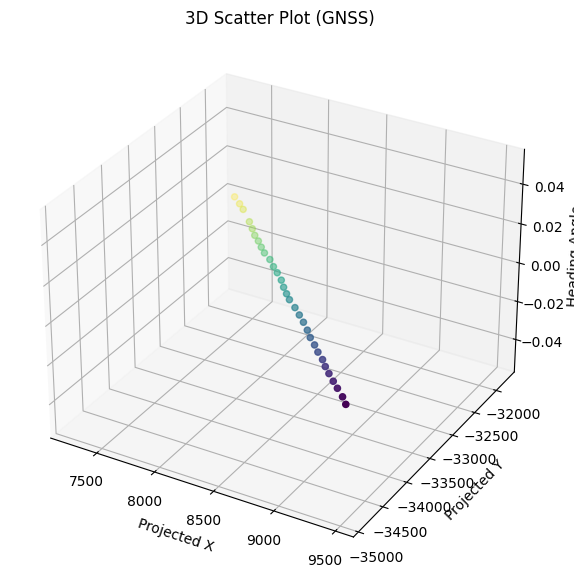

In [ ]:
if __name__ == "__main__":
    main()